## Predicting the price of buldozer using Machine Learning 
    in this project i will be building a model that will help me to predict the price of a buldozer using the data give
    
## 1. Problem Definition:
    > How well can i predict the price of a buldozer given its characteristics and previous examples of well bullsdozers have been sold for

## 2.Data

 > Data: the data is taken from the kaggle dataset blue Book for bulldozers: 
 For this competition, you are predicting the sale price of bulldozers sold at auctions.
 
 dataset for this project is found here: https://www.kaggle.com/c/bluebook-for-bulldozers/data

For this competition, you are predicting the sale price of bulldozers sold at auctions.

The data for this competition is split into three parts:

   *  Train.csv is the training set, which contains data through the end of 2011.
   *  Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this        - set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
   * Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3.Evaluation 

   The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices
   
   **Note**: the goal for most Regession evalution metricis is to minimize the error, but however, to goal for this project is to build a model that will help to minimize the RMSLE.
   
   **Checck the evalution from kaggle**: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## 4. Features 
       
       features deals with the data dictionary given to us by the competition organizers: 
       


    
    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##importing the training and validation set
df = pd.read_csv("datas/TrainAndValid.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

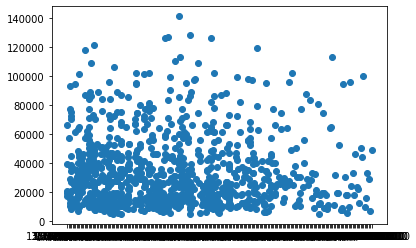

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

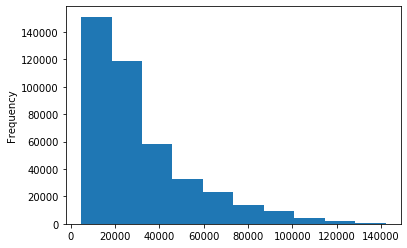

In [7]:
df.SalePrice.plot.hist()

## will now be converting the saledate object to another redable form using the `Parse date method`.
        
           **Parsing**: is the process of changing dates into a date time object form using pandas

In [8]:
df = pd.read_csv("datas/TrainAndValid.csv",low_memory=False, parse_dates=["saledate"])

In [9]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [10]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


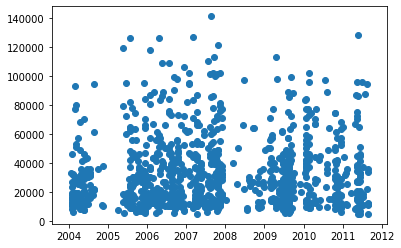

In [11]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

## sorting the saledate

 when working with time series data it is important to sort the date

In [14]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)

In [15]:
df.saledate.head(100)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
113454   1989-01-31
62665    1989-01-31
78445    1989-01-31
233279   1989-02-01
28223    1989-02-01
Name: saledate, Length: 100, dtype: datetime64[ns]

## Always try to make a copy of the original dataset
         
         i am making a copy of the original dataset in order to make it easy to get back the original dataframe whenever mistake arises in the near future

In [49]:
df_temp = df.copy()

In [51]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Adding DateTime Parameter to my saledate column
    

In [66]:
df_temp["SaleYear"] =df_temp.saledate.dt.year
df_temp["SaleMonth"] = df_temp.saledate.dt.month
df_temp["saleday"]= df_temp.saledate.dt.day
df_temp["saleDayFfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [67]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,saleday,saledayofweek,saleDayFfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,1,17
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,1989,1,31,1,1,31
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,1989-01-31,...,Angle,None or Unspecified,NaN,NaN,1989,1,31,1,1,31
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,1989-01-31,...,NaN,NaN,Standard,Conventional,1989,1,31,1,1,31
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,1989,1,31,1,1,31


In [68]:
df_temp.drop("saledate",axis=1, inplace=True)

In [73]:
df_temp.state

205615         Texas
233186       Florida
142491       Florida
115536       Florida
92301        Florida
             ...    
409901    California
405777    California
411889    California
411890    California
409203    California
Name: state, Length: 412698, dtype: object

In [70]:
df_temp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

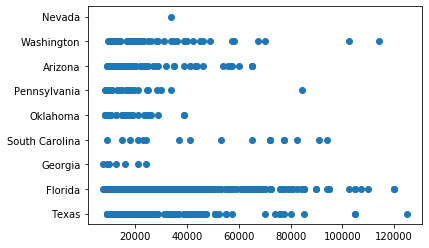

In [86]:
fig, ax = plt.subplots()
ax.scatter(df["SalePrice"][:1000],df["state"][:1000])

In [95]:
df_temp.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500,30000,21000,33000,24000
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416


## 5 Modelling
  > from now  i will be focusing more on building the machine learning model that will help me to have an overview of the data.
      EDA: exploratory datanalysis is quiet ok now

In [89]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [94]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(df_temp.drop("SalePrice", axis =1), df_temp["SalePrice"])

ValueError: could not convert string to float: 'Medium'

# Converting strings into Numbers using pandas

In [97]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [112]:
df_temp.items

<bound method DataFrame.items of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
233186  1728883    30000.0    1523610     9105         132          99.0   
142491  1508502    21000.0    1153157     4138         132          99.0   
115536  1452578    33000.0    1544443     3854         132          99.0   
92301   1403418    24000.0    1390168     7110         132          99.0   
...         ...        ...        ...      ...         ...           ...   
409901  6286556    23000.0    1793587     4605         149          99.0   
405777  6256957    11500.0    1860454     6868         149          99.0   
411889  6312472    11000.0    1820676    17231         149          99.0   
411890  6312473    11000.0    1796787    17231         149          99.0   
409203  6283635    34000.0    1869284     4701         149          99.0   

        YearMade  MachineHoursCurrentMeter UsageBand f

In [100]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


## final conversion

In [102]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] =  content.astype("category").cat.as_ordered()

In [104]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [108]:
df_temp.state

205615         Texas
233186       Florida
142491       Florida
115536       Florida
92301        Florida
             ...    
409901    California
405777    California
411889    California
411890    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): [Alabama < Alaska < Arizona < Arkansas ... Washington DC < West Virginia < Wisconsin < Wyoming]

In [110]:
df_temp.state.cat.codes

205615    43
233186     8
142491     8
115536     8
92301      8
          ..
409901     4
405777     4
411889     4
411890     4
409203     4
Length: 412698, dtype: int8

# Exporting preprocessed Data

In [113]:
df_temp.to_csv("datas/train_temp.csv", index=False)

# importing the preprocessed data

In [121]:
df_temp.to_csv= pd.read_csv("datas/train_temp.csv", low_memory = False)
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,saleday,saledayofweek,saleDayFfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,1,17
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,WA150,...,NaN,NaN,NaN,NaN,1989,1,31,1,1,31
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,D7F,...,Angle,None or Unspecified,NaN,NaN,1989,1,31,1,1,31
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,966C,...,NaN,NaN,Standard,Conventional,1989,1,31,1,1,31
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,1989,1,31,1,1,31


# Filling the missing values

### filling the missing numeric values

In [122]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
saleday
saledayofweek
saleDayFfWeek
saleDayOfYear


### checking for missing numeric values 

In [125]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


### fill the missing numeric with median

In [126]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # tells us if the data was missing or not
            df_temp[label + "is_missing"] = pd.isnull(content)
            #fill the missing values with media
            df_temp[label] =content.fillna(content.median())
            

In [127]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [128]:
df_temp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

## filling and turning categorical variables into numbers


In [130]:
## checking for columns that arent numericals
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [136]:
## turning categorical variables into numbers and filling missings
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Adding a binary column to indicate if sample is missing or not
        df_temp[label + "is_missing"] = pd.isnull(content)
        # turn categoris into numbers
        df_temp[label] = pd.Categorical(content).codes+1
        
        

In [137]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 104 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(11), int8(40)
memory usage: 84.2 MB


In [138]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
233186,1728883,30000.0,1523610,9105,132,99.0,1986,0.0,0,4772,...,True,True,True,True,True,True,True,True,True,True
142491,1508502,21000.0,1153157,4138,132,99.0,1972,0.0,0,2347,...,True,True,True,True,True,False,False,False,True,True
115536,1452578,33000.0,1544443,3854,132,99.0,1974,0.0,0,1767,...,True,True,True,True,True,True,True,True,False,False
92301,1403418,24000.0,1390168,7110,132,99.0,1986,0.0,0,744,...,True,True,True,True,True,True,True,True,True,True


In [139]:
df_temp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 104, dtype: int64

## building the machine learning Model hence we dont have any missing values

In [140]:
len(df_temp)

412698

In [141]:
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=42)

##fitting the modeel
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])


Wall time: 5min 11s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [142]:
##score the mode
model.score(df_temp.drop("SalePrice",axis =1), df_temp["SalePrice"])

0.9875996235909229

# splitting data into train and validation

In [147]:
df_temp.SaleYear

205615    1989
233186    1989
142491    1989
115536    1989
92301     1989
          ... 
409901    2012
405777    2012
411889    2012
411890    2012
409203    2012
Name: SaleYear, Length: 412698, dtype: int64

In [150]:
## if year is = 2012 it will be in the validation set while it is not in the year of 2012 it will be in the train set
df_val = df_temp[df_temp.SaleYear == 2012]
df_train = df_temp[df_temp.SaleYear !=2012]
len(df_val),len(df_train)

(11573, 401125)

In [152]:
from sklearn.model_selection import train_test_split
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 103), (401125,), (11573, 103), (11573,))

## Building the evaluaiton function for our model

In [168]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rmsle(y_test, y_preds):
    """
         helps in calculating the root mean squared error betweeen the predictions and the true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#create a function that will help evalute our models in different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Teaining MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE":mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Trainig R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)
             }
    return scores

In [169]:
model = RandomForestRegressor(n_jobs=-1, random_state=42,
                             max_samples=10000)

model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [170]:
%%time
model.fit(X_train, y_train)

Wall time: 8.11 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [171]:
show_scores(model)

{'Teaining MAE': 5550.958799800562,
 'Valid MAE': 7199.364562343385,
 'Training RMSLE': 0.25742510727221196,
 'Valid RMSLE': 0.29429584645757995,
 'Trainig R^2': 0.8609656539498823,
 'Valid R^2': 0.8310477618588481}